# Image Classification and Regression

## MVA - CentraleSupelec

In [2]:
import matplotlib.pyplot as plt
# %matplotlib inline
import numpy as np

from keras.utils import np_utils
from keras import optimizers

import assignment_1_data as teacher

IMAGE_SIZE = 72

### Testing drawing functions

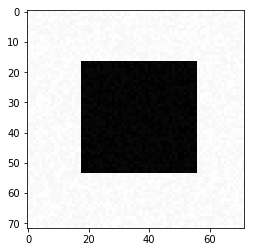

In [3]:
# Genereate a rectangle
im = teacher.generate_a_rectangle(10, False)
plt.imshow(im.reshape(IMAGE_SIZE,IMAGE_SIZE), cmap='gray')

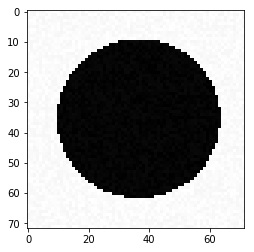

In [4]:
# Generate a disk
im = teacher.generate_a_disk(10)
plt.imshow(im.reshape(IMAGE_SIZE,IMAGE_SIZE), cmap='gray')

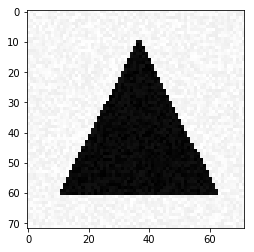

In [5]:
# Generate a triangle
[im, v] = teacher.generate_a_triangle(20, False)
plt.imshow(im.reshape(IMAGE_SIZE,IMAGE_SIZE), cmap='gray')

### Functions to plot 16 or 1 class

In [6]:
# Useful functions
class_names = ['rectangle', 'disk', 'triangle']
       
    
def plotting_sixteen_classes(x, y, y_predict=None):
    """Plot 16 first figures"""
    plt.figure(figsize=(10, 10))
    for i in range(16):
        plt.subplot(4, 4, i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(x[i].reshape(72,72), cmap= 'gray')
        
        if y_predict is not None:
            try:
                if class_names[y_predict[i].index(max(y_predict[i]))] == class_names[int(y[i])]:
                    plt.xlabel('Predicted: ' + class_names[y_predict[i].index(max(y_predict[i]))], color='b')
                else:
                    plt.xlabel('Predicted: ' + class_names[y_predict[i].index(max(y_predict[i]))], color='r')
            except TypeError:
                index_to_predict = list(y[i]).index(np.max(list(y[i]))) 
                if class_names[y_predict[i].index(max(y_predict[i]))] == class_names[index_to_predict]:
                    plt.xlabel('Predicted: ' + class_names[y_predict[i].index(max(y_predict[i]))], color='b')
                else:
                    plt.xlabel('Predicted: ' + class_names[y_predict[i].index(max(y_predict[i]))], color='r')
            
        else: 
            list_result = list(y[i])
            plt.xlabel(class_names[list_result.index(np.max(list_result))])
        
        
def plotting_one_class(x, y, y_predict=None):
    """Plot 1 figure"""
    plt.figure(figsize=(5, 5))
    plt.imshow(x.reshape(72,72), cmap= 'gray')
    if y_predict is not None:
        y_predict = y_predict.tolist()
        if class_names[y_predict[0].index(max(y_predict[0]))] == class_names[int(y[0])]:
            plt.xlabel('Predicted: '+ class_names[y_predict[0].index(max(y_predict[0]))], color='b')
        else:
            plt.xlabel('Predicted --> '+ class_names[y_predict[0].index(max(y_predict[0]))], color='r')
    else: 
        list_result = list(y[0])
        plt.xlabel(class_names[list_result.index(np.max(list_result))]) 
    list_y = list(y[0])
    plt.xlabel(class_names[list_y.index(np.max(list_y))])
    

# 3-4.  Simple Classification & Visualization

#### Generate a training set of images

In [7]:
[X_train, Y_train] = teacher.generate_dataset_classification(300, 20)
Y_train = np_utils.to_categorical(Y_train)

Creating data:
0 / 300
100 / 300
200 / 300
300 / 300


Plotting the data train

X_train shape: (300, 5184)
Y_train shape: (300, 3)


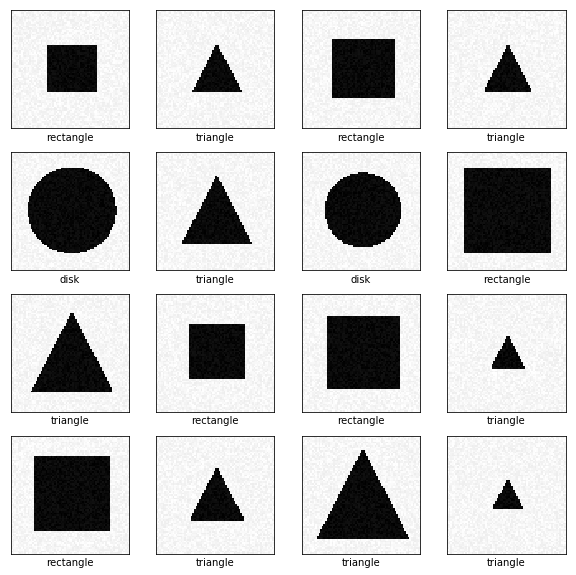

In [8]:
print('X_train shape:', X_train.shape)
print('Y_train shape:', Y_train.shape)
plotting_sixteen_classes(X_train, Y_train)

### Building the Network

In [9]:
# Importing useful libraries for Deep Learning

from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import SGD

from keras.layers import Dropout
from keras.layers import Flatten

# Convolutional Deep Network
from keras.layers import Conv2D, MaxPooling2D

#### A. Stochastic Gradient Descent Optimizer

In [10]:
# Stochastic Gradient Descent
model_sgd = Sequential()

model_sgd.add(Dense(48, activation='relu'))
model_sgd.add(Dense(3, activation='softmax'))

sgd = SGD(lr=0.001, decay=1e-6, momentum=0.9, nesterov=True)
model_sgd.compile(loss='mean_squared_error', optimizer=sgd, metrics=['accuracy'])

model_sgd.fit(X_train, Y_train, batch_size=32, epochs=20, validation_split = 0.2)

Train on 240 samples, validate on 60 samples
Epoch 1/20
240/240 [==============================] - 1s 4ms/step - loss: 0.2224 - acc: 0.5042 - val_loss: 0.1887 - val_acc: 0.7000
Epoch 2/20
240/240 [==============================] - 0s 421us/step - loss: 0.1858 - acc: 0.6542 - val_loss: 0.1723 - val_acc: 0.6500
Epoch 3/20
240/240 [==============================] - 0s 429us/step - loss: 0.1679 - acc: 0.6542 - val_loss: 0.1543 - val_acc: 0.7000
Epoch 4/20
240/240 [==============================] - 0s 396us/step - loss: 0.1511 - acc: 0.6958 - val_loss: 0.1487 - val_acc: 0.6833
Epoch 5/20
240/240 [==============================] - 0s 438us/step - loss: 0.1393 - acc: 0.6917 - val_loss: 0.1232 - val_acc: 0.7500
Epoch 6/20
240/240 [==============================] - 0s 508us/step - loss: 0.1263 - acc: 0.7417 - val_loss: 0.1227 - val_acc: 0.7500
Epoch 7/20
240/240 [==============================] - 0s 446us/step - loss: 0.1183 - acc: 0.7875 - val_loss: 0.1089 - val_acc: 0.8667
Epoch 8/20
240/240 

Blue: Correct answer 
Red : Wrong answer

Creating data:
0 / 16
16 / 16


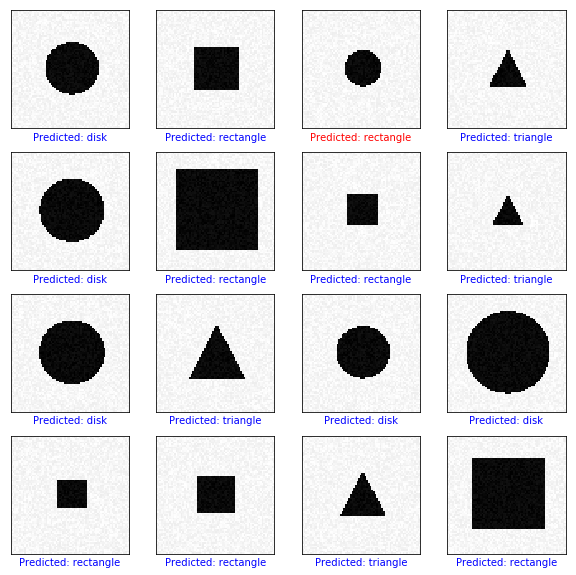

In [11]:
# Check the classifier
[x_test_sgd, y_test_sgd] = teacher.generate_dataset_classification(16, 20)
y_predict_sgd = model_sgd.predict(x_test_sgd).tolist()
plotting_sixteen_classes(x_test_sgd, y_test_sgd, y_predict_sgd)

#### Visualization of SGD Solution

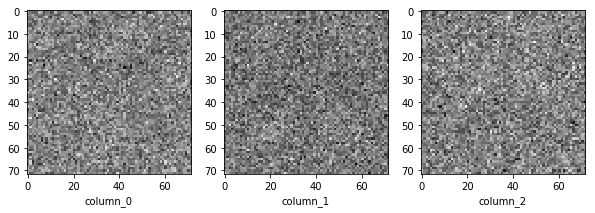

In [12]:
sgd_parameters = model_sgd.get_weights()

matrix_w1_sgd = sgd_parameters[0]
matrix_w2_sgd = sgd_parameters[2]

matrix_w_sgd = matrix_w1_sgd @ matrix_w2_sgd

vector_b_sgd = sgd_parameters[1]

column_sgd_0 = matrix_w_sgd[:, 0]
column_sgd_1 = matrix_w_sgd[:, 1]
column_sgd_2 = matrix_w_sgd[:, 2]

list_columns_sgd = [column_sgd_0, column_sgd_1, column_sgd_2]
plt.figure(figsize=(10, 10))
for i in range(3):
    plt.subplot(1, 3, i+1)
    plt.imshow(list_columns_sgd[i].reshape(72,72), cmap= 'gray')
    plt.xlabel("column_" + str(i))

#### B. Adam Optimizer

In [13]:
# Adam Optimizer
model_adam = Sequential()

model_adam.add(Dense(3, activation='softmax'))

model_adam.compile(loss='categorical_crossentropy', optimizer="adam", metrics=['accuracy'])

model_adam.fit(X_train, Y_train, batch_size=32, epochs=20, validation_split = 0.2)

Train on 240 samples, validate on 60 samples
Epoch 1/20
240/240 [==============================] - 1s 3ms/step - loss: 2.0703 - acc: 0.4500 - val_loss: 0.7792 - val_acc: 0.6667
Epoch 2/20
240/240 [==============================] - 0s 267us/step - loss: 1.0508 - acc: 0.5833 - val_loss: 1.0230 - val_acc: 0.3833
Epoch 3/20
240/240 [==============================] - 0s 296us/step - loss: 0.7909 - acc: 0.6125 - val_loss: 0.7445 - val_acc: 0.6167
Epoch 4/20
240/240 [==============================] - 0s 263us/step - loss: 0.5742 - acc: 0.7292 - val_loss: 0.5221 - val_acc: 0.6500
Epoch 5/20
240/240 [==============================] - 0s 350us/step - loss: 0.4275 - acc: 0.8292 - val_loss: 0.5176 - val_acc: 0.7000
Epoch 6/20
240/240 [==============================] - 0s 346us/step - loss: 0.4046 - acc: 0.7917 - val_loss: 0.3561 - val_acc: 0.8333
Epoch 7/20
240/240 [==============================] - 0s 329us/step - loss: 0.3625 - acc: 0.8042 - val_loss: 0.2926 - val_acc: 0.9000
Epoch 8/20
240/240 

Creating data:
0 / 16
16 / 16


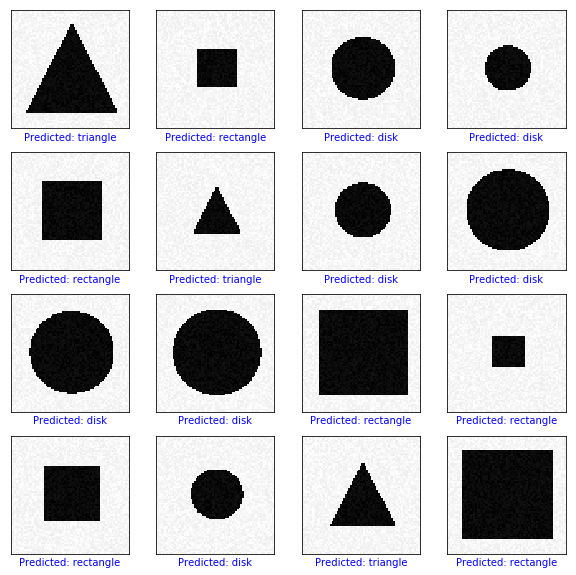

In [14]:
# Check Adam classifier
[x_test_adam, y_test_adam] = teacher.generate_dataset_classification(16, 20)
y_predict_adam = model_adam.predict(x_test_adam).tolist()
plotting_sixteen_classes(x_test_adam, y_test_adam, y_predict_adam)

#### Visualization of Adam Solution

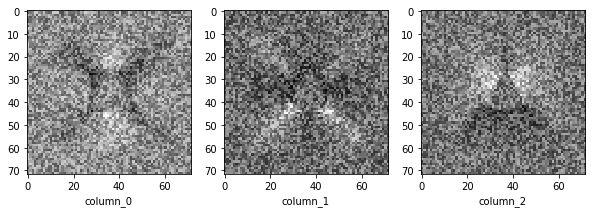

In [15]:
adam_parameters = model_adam.get_weights()
matrix_w = adam_parameters[0]
vector_b = adam_parameters[1]

column_adam_0 = matrix_w[:, 0]
column_adam_1 = matrix_w[:, 1]
column_adam_2 = matrix_w[:, 2]

list_columns_adam = [column_adam_0, column_adam_1, column_adam_2]
plt.figure(figsize=(10, 10))
for i in range(3):
    plt.subplot(1, 3, i+1)
    plt.imshow(list_columns_adam[i].reshape(72,72), cmap= 'gray')
    plt.xlabel("column_" + str(i))

# 5. A More Difficult Classification Problem

Creating data:
0 / 1000
100 / 1000
200 / 1000
300 / 1000
400 / 1000
500 / 1000
600 / 1000
700 / 1000
800 / 1000
900 / 1000
1000 / 1000
Creating data:
0 / 300
100 / 300
200 / 300
300 / 300
X_train shape: (1000, 72, 72, 1)
X_test shape : (300, 72, 72, 1)


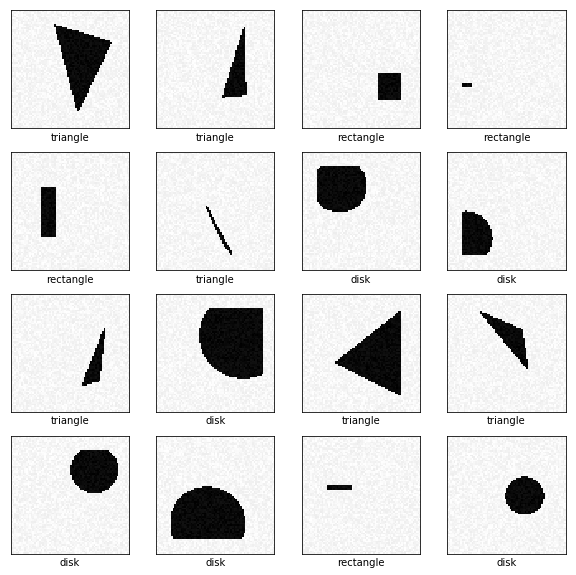

In [17]:
# Generate new training and test sets
[X_train, Y_train] = teacher.generate_dataset_classification(1000, 20, True)
[X_test, Y_test] = teacher.generate_test_set_classification()

Y_train = np_utils.to_categorical(Y_train)
plotting_sixteen_classes(X_train, Y_train)

# Reformating the input
X_train = X_train.reshape(X_train.shape[0], 72, 72, 1)
X_test = X_test.reshape(X_test.shape[0], 72, 72, 1)
print("X_train shape:", X_train.shape)
print("X_test shape :", X_test.shape)

In [18]:
# Convolutional Deep Network 
model_cnn = Sequential()

# Convolutional Layer with 16 (5x5) filters, activation is ReLu
model_cnn.add(Conv2D(16, (5, 5), activation='relu', input_shape=(72, 72, 1)))
print(model_cnn.output_shape)

# Pooling Layer
model_cnn.add(MaxPooling2D(pool_size=(2, 2)))
print(model_cnn.output_shape)

model_cnn.add(Conv2D(32, (3, 3), activation='relu'))
print(model_cnn.output_shape)

model_cnn.add(MaxPooling2D(pool_size=(2, 2)))
print(model_cnn.output_shape)

#Flattening before Fully Connected Layers
model_cnn.add(Flatten())
print(model_cnn.output_shape)

model_cnn.add(Dense(40, activation='relu'))
print(model_cnn.output_shape)

model_cnn.add(Dense(3, activation='softmax'))
print(model_cnn.output_shape)

model_cnn.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model_cnn.fit(X_train, Y_train, batch_size=32, epochs=20, validation_split= 0.3)

(None, 68, 68, 16)
(None, 34, 34, 16)
(None, 32, 32, 32)
(None, 16, 16, 32)
(None, 8192)
(None, 40)
(None, 3)
Train on 700 samples, validate on 300 samples
Epoch 1/20
700/700 [==============================] - 30s 43ms/step - loss: 1.0932 - acc: 0.4629 - val_loss: 0.9810 - val_acc: 0.5533
Epoch 2/20
700/700 [==============================] - 29s 42ms/step - loss: 0.8839 - acc: 0.6000 - val_loss: 0.7931 - val_acc: 0.7100
Epoch 3/20
700/700 [==============================] - 30s 43ms/step - loss: 0.7221 - acc: 0.6771 - val_loss: 0.7276 - val_acc: 0.7133
Epoch 4/20
700/700 [==============================] - 28s 40ms/step - loss: 0.6450 - acc: 0.7114 - val_loss: 0.7202 - val_acc: 0.7167
Epoch 5/20
700/700 [==============================] - 26s 37ms/step - loss: 0.6203 - acc: 0.7300 - val_loss: 0.6861 - val_acc: 0.7167
Epoch 6/20
700/700 [==============================] - 26s 37ms/step - loss: 0.5615 - acc: 0.7557 - val_loss: 0.6801 - val_acc: 0.7133
Epoch 7/20
700/700 [====================

Evaluation of the model: returns (loss function, accuracy)

In [30]:
model_cnn.evaluate(X_test, Y_test)

300/300 [==============================] - 2s 6ms/step


[0.38194964130719505, 0.9033333341280619]

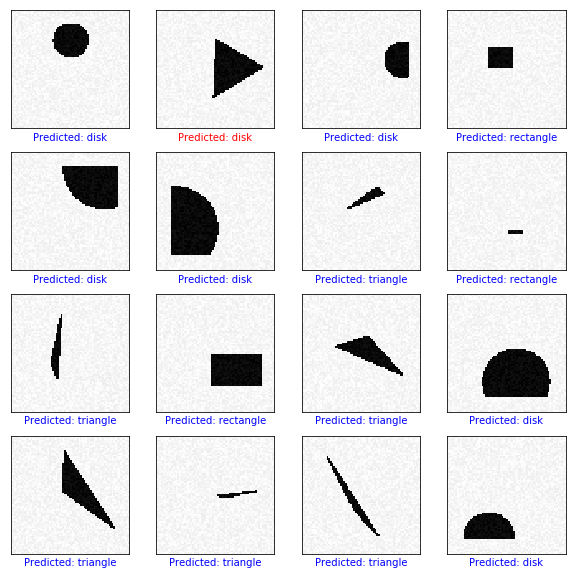

In [63]:
# Check the classifier
Y_test_predict = model_cnn.predict(X_test).tolist()
plotting_sixteen_classes(X_test, y_test, Y_test_predict)

# 6. Regression Problem

Generate training data and visualize a sample

Creating data:
0 / 500
100 / 500
200 / 500
300 / 500
400 / 500
500 / 500


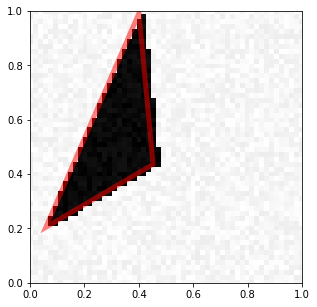

In [19]:
# Generate training set
[X_train, Y_train] = teacher.generate_dataset_regression(500, 20)
teacher.visualize_prediction(X_train[0], Y_train[0])

Reformating the input X

In [20]:
X_train = X_train.reshape(X_train.shape[0], 72, 72, 1)
print("X_train shape:", X_train.shape)

X_train shape: (500, 72, 72, 1)


Useful function to normalize the input Y:
It get easier to predict a triangle's corners when the model is trained on ordered corners (based on position y or x of the three corners)

In [21]:
# Reformating the input Y
print("Original   Y:", Y_train[0])

def normalize_triangle_y(Y_train):
    """Input: [x1, y1, x2, y2, x3, y3]
    Order the input from the highest y to the lowest
    ex: y2 > y3 > y1
    Output: [x2, y2, x3, y3, x1, y1]"""
    for i, train in enumerate(Y_train):
        dict_coord = {train[1]: train[0],
                     train[3]: train[2],
                     train[5]: train[4]}
        y_coord = [train[1], train[3], train[5]]
        y_coord.sort()
        list_final = []
        for y in y_coord:
            list_final.append(dict_coord[y])
            list_final.append(y)
        Y_train[i] = list_final
    return Y_train

Y_train = normalize_triangle_y(Y_train)
print("Normalized Y:", Y_train[0])

Original   Y: [0.45256219 0.43594428 0.40040836 0.99131074 0.05798788 0.2044488 ]
Normalized Y: [0.05798788 0.2044488  0.45256219 0.43594428 0.40040836 0.99131074]


In [22]:
from keras.layers import Dropout
# Regressor model
model_reg = Sequential()
model_reg.add(Conv2D(32, (3, 3), activation='relu'))
model_reg.add(MaxPooling2D(pool_size=(2, 2)))

model_reg.add(Conv2D(64, (3, 3), activation='relu'))
model_reg.add(MaxPooling2D(pool_size=(2, 2)))

model_reg.add(Conv2D(128, (3, 3), activation='relu'))
model_reg.add(MaxPooling2D(pool_size=(2, 2)))

model_reg.add(Flatten())

model_reg.add(Dense(128, activation='relu'))
model_reg.add(Dropout(0.3))
model_reg.add(Dense(128, activation='relu'))

model_reg.add(Dense(6, activation = 'linear'))

model_reg.compile(loss='mean_squared_error', optimizer='adam')

model_reg.fit(X_train, Y_train, batch_size=32, epochs=20, validation_split=0.4)

Train on 300 samples, validate on 200 samples
Epoch 1/20
300/300 [==============================] - 16s 52ms/step - loss: 0.1527 - val_loss: 0.0595
Epoch 2/20
300/300 [==============================] - 17s 57ms/step - loss: 0.0859 - val_loss: 0.0701
Epoch 3/20
300/300 [==============================] - 16s 54ms/step - loss: 0.0740 - val_loss: 0.0551
Epoch 4/20
300/300 [==============================] - 14s 46ms/step - loss: 0.0568 - val_loss: 0.0381
Epoch 5/20
300/300 [==============================] - 14s 47ms/step - loss: 0.0488 - val_loss: 0.0347
Epoch 6/20
300/300 [==============================] - 14s 48ms/step - loss: 0.0423 - val_loss: 0.0331
Epoch 7/20
300/300 [==============================] - 16s 53ms/step - loss: 0.0390 - val_loss: 0.0342
Epoch 8/20
300/300 [==============================] - 16s 52ms/step - loss: 0.0353 - val_loss: 0.0294
Epoch 9/20
300/300 [==============================] - 16s 52ms/step - loss: 0.0353 - val_loss: 0.0310
Epoch 10/20
300/300 [===============

In [23]:
# Generate test set
[X_test, Y_test] = teacher.generate_test_set_regression()
# Reshape X and normalize Y
[X_test, Y_test] = [X_test.reshape(X_test.shape[0], 72, 72, 1), normalize_triangle_y(Y_test)]

Creating data:
0 / 300
100 / 300
200 / 300
300 / 300


In [75]:
# Evaluate the model
model_reg.evaluate(X_test, Y_test)

300/300 [==============================] - 3s 9ms/step


0.016752328835427762

(72, 72, 1)


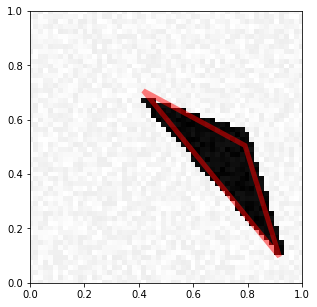

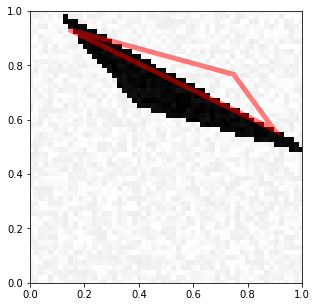

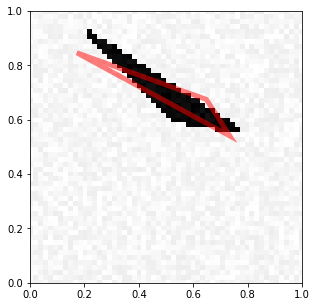

In [81]:
y_predict_reg = model_reg.predict(X_test)
print(X_test[0].shape)
for i in range(5, 8):
    teacher.visualize_prediction(X_test[i], y_predict_reg[i])

## 7. Image Denoising

### New functions to generate pairs of images

In [27]:
def generate_pair_triangles(noise=0.0, free_location=False):
    figsize = 1.0
    if free_location:
        U = np.random.random(3)
        V = np.random.random(3)
    else:
        size = (0.3 + 0.7 * np.random.random())*figsize/2
        middle = figsize/2
        U = (middle, middle+size, middle-size)
        V = (middle+size, middle-size, middle-size)
    imdata_noise = teacher.generate_a_drawing(figsize, U, V, noise)
    imdata_noise_free = teacher.generate_a_drawing(figsize, U, V, 0)
    return [[imdata_noise, imdata_noise_free], [U[0], V[0], U[1], V[1], U[2], V[2]]]


def generate_pair_disks(noise=0.0, free_location=False):
    figsize = 1.0
    if free_location:
        center = np.random.random(2)
    else:
        center = (figsize/2, figsize/2)
    radius = (0.3 + 0.7 * np.random.random()) * figsize/2
    N = 50
    U = np.zeros(N)
    V = np.zeros(N)
    i = 0
    for t in np.linspace(0, 2*np.pi, N):
        U[i] = center[0] + np.cos(t) * radius
        V[i] = center[1] + np.sin(t) * radius
        i = i + 1
    return [teacher.generate_a_drawing(figsize, U, V, noise), teacher.generate_a_drawing(figsize, U, V, 0)]


def generate_pair_rectangles(noise=0.0, free_location=False):
    figsize = 1.0    
    U = np.zeros(4)
    V = np.zeros(4)
    if free_location:
        corners = np.random.random(4)
        top = max(corners[0], corners[1])
        bottom = min(corners[0], corners[1])
        left = min(corners[2], corners[3])
        right = max(corners[2], corners[3])
    else:
        side = (0.3 + 0.7 * np.random.random()) * figsize
        top = figsize/2 + side/2
        bottom = figsize/2 - side/2
        left = bottom
        right = top
    U[0] = U[1] = top
    U[2] = U[3] = bottom
    V[0] = V[3] = left
    V[1] = V[2] = right
    return [teacher.generate_a_drawing(figsize, U, V, noise), teacher.generate_a_drawing(figsize, U, V, 0)]


def generate_dataset_classification_by_pairs(nb_samples, noise=0.0, free_location=False):
    # Getting im_size:
    im_size = teacher.generate_a_rectangle().shape[0]
    X_noise = np.zeros([nb_samples,im_size])
    X_noise_free = np.zeros([nb_samples,im_size])
    print('Creating data:')
    for i in range(nb_samples):
        noise_i = np.random.randint(255)
        if i % 100 == 0:
            print(i, "/", nb_samples)
        category = np.random.randint(3)
        if category == 0:
            [X_noise[i], X_noise_free[i]] = generate_pair_rectangles(noise_i, free_location)
        elif category == 1: 
            [X_noise[i], X_noise_free[i]] = generate_pair_disks(noise_i, free_location)
        else:	
            [X_noise[i], X_noise_free[i]] = generate_pair_triangles(noise_i, free_location)[0]
        X_noise[i] = (X_noise[i] + noise_i) / (255 + 2 * noise_i)
        X_noise_free[i] = X_noise_free[i] / 255
    print(nb_samples, "/", nb_samples)
    return [X_noise, X_noise_free]


def generate_test_set_classification_by_pairs():
    np.random.seed(42)
    [X_test, Y_test] = generate_dataset_classification_by_pairs(300, 20, True)
    return [X_test, Y_test]

### Useful function to plot results

In [25]:
def denoise_plot(nb_samples, x, y, y_predict):
    plt.figure(figsize=(10,10))
    for i in range(nb_samples):
        for k in range(1, 4):
            plt.subplot(nb_samples, 3, 3 * i + k)
            plt.xticks([])
            plt.yticks([])
            plt.grid(False)
            if k == 1:
                plt.imshow(x[i].reshape(72,72), cmap= 'gray')
                plt.xlabel('Noised image')
            elif k == 2:
                plt.imshow(y[i].reshape(72,72), cmap= 'gray')
                plt.xlabel('Expected denoised image')
            elif k == 3:
                plt.imshow(y_predict[i].reshape(72,72), cmap= 'gray')
                plt.xlabel('Predicted denoised image')

In [28]:
# Generate data train 
X_noised_train, Y_denoised_train = generate_dataset_classification_by_pairs(600, 50, True)

Creating data:
0 / 600
100 / 600
200 / 600
300 / 600
400 / 600
500 / 600
600 / 600


In [29]:
# Reshape X_train_noise
X_noised_train = X_noised_train.reshape((X_noised_train.shape[0], 72, 72, 1))
Y_denoised_train = Y_denoised_train.reshape((Y_denoised_train.shape[0], 72, 72, 1))

print('X_noised_train shape  :', X_noised_train.shape)
print('Y_denoised_train shape:', Y_denoised_train.shape)

X_noised_train shape  : (600, 72, 72, 1)
Y_denoised_train shape: (600, 72, 72, 1)


Visualize the training sets

Text(0.5,1,'Denoised image generated')

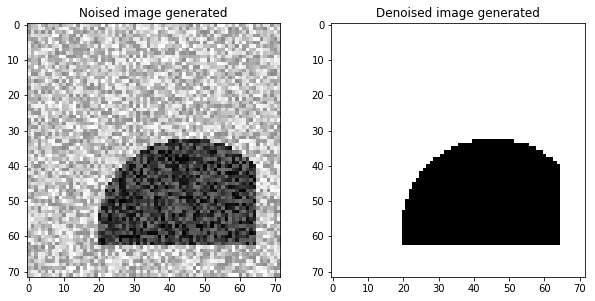

In [30]:
f, axes = plt.subplots(1, 2, figsize=(10, 10))

axes[0].imshow(X_noised_train[2].reshape(72, 72), cmap= 'gray')
axes[0].set_title('Noised image generated')
    
axes[1].imshow(Y_denoised_train[2].reshape(72, 72), cmap= 'gray')
axes[1].set_title('Denoised image generated')

### Denoising model

In [31]:
from keras.layers import advanced_activations, UpSampling2D

model_denoise = Sequential()

model_denoise.add(Conv2D(32, kernel_size=(3,3),activation='linear',input_shape=(72,72,1), padding='same'))
model_denoise.add(advanced_activations.LeakyReLU(alpha=0.1))
print(model_denoise.output_shape)

model_denoise.add(MaxPooling2D(pool_size=(2, 2)))
print(model_denoise.output_shape)

model_denoise.add(Conv2D(64, kernel_size=(3,3),activation='linear', padding='same'))
model_denoise.add(advanced_activations.LeakyReLU(alpha=0.1))
print(model_denoise.output_shape)

model_denoise.add(MaxPooling2D(pool_size=(2, 2)))
print(model_denoise.output_shape)

model_denoise.add(Conv2D(32, kernel_size=(3,3),activation='linear', padding='same'))
model_denoise.add(advanced_activations.LeakyReLU(alpha=0.1))
print(model_denoise.output_shape)

model_denoise.add(UpSampling2D(size=(2, 2)))
print(model_denoise.output_shape)

model_denoise.add(Conv2D(32, kernel_size=(3,3),activation='linear', padding='same'))
model_denoise.add(UpSampling2D(size=(2, 2)))
model_denoise.add(advanced_activations.LeakyReLU(alpha=0.1))
print(model_denoise.output_shape)

model_denoise.add(Conv2D(1, kernel_size=(3,3),activation='sigmoid', padding='same'))

model_denoise.compile(loss='mean_squared_error', optimizer = 'adam' ,metrics=['accuracy'])

model_denoise.fit(X_noised_train, Y_denoised_train, batch_size = 20, epochs= 20, validation_split = 0.4)

(None, 72, 72, 32)
(None, 36, 36, 32)
(None, 36, 36, 64)
(None, 18, 18, 64)
(None, 18, 18, 32)
(None, 36, 36, 32)
(None, 72, 72, 32)
Train on 360 samples, validate on 240 samples
Epoch 1/20
360/360 [==============================] - 34s 95ms/step - loss: 0.1109 - acc: 0.9008 - val_loss: 0.0892 - val_acc: 0.9080
Epoch 2/20
360/360 [==============================] - 35s 96ms/step - loss: 0.0791 - acc: 0.9091 - val_loss: 0.0688 - val_acc: 0.9114
Epoch 3/20
360/360 [==============================] - 37s 103ms/step - loss: 0.0351 - acc: 0.9607 - val_loss: 0.0103 - val_acc: 0.9889
Epoch 4/20
360/360 [==============================] - 35s 97ms/step - loss: 0.0105 - acc: 0.9858 - val_loss: 0.0097 - val_acc: 0.9868
Epoch 5/20
360/360 [==============================] - 34s 95ms/step - loss: 0.0073 - acc: 0.9904 - val_loss: 0.0062 - val_acc: 0.9922
Epoch 6/20
360/360 [==============================] - 34s 96ms/step - loss: 0.0063 - acc: 0.9918 - val_loss: 0.0058 - val_acc: 0.9928
Epoch 7/20
360/3

In [32]:
# Create test sets
[X_noised_test, Y_denoised_test] = generate_test_set_classification_by_pairs()
X_noised_test = X_noised_test.reshape(300, 72, 72, 1)
Y_predict_denoised = model_denoise.predict(X_noised_test)

Creating data:
0 / 300
100 / 300
200 / 300
300 / 300


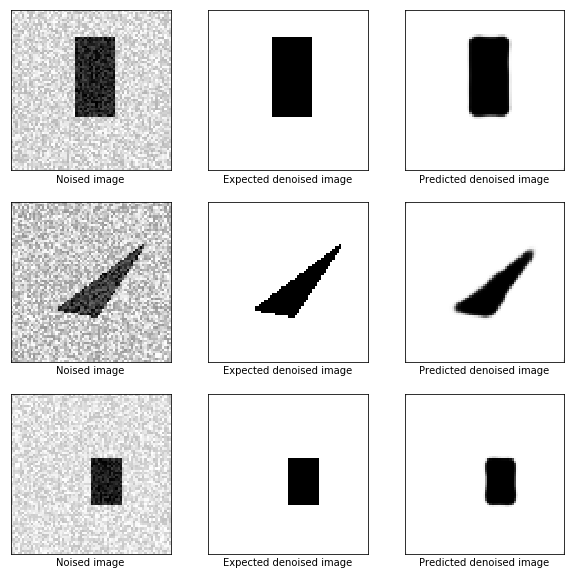

In [35]:
# Check the model
denoise_plot(3, X_noised_test, Y_denoised_test, Y_predict_denoised)